In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
df=pd.read_csv('Kickstarter_scrapped.csv')

In [6]:
df.head()

,backers_count,blurb,categoryId,categoryName,categorySlug,converted_pledged_amount,country,country_displayable_name,created_at,created_at_formatted,...,video/frame,video/height,video/high,video/high_type,video/hls,video/hls_type,video/id,video/status,video/tracks,video/width
0,17,STL FILES FOR 3D PRINTING - 75 mm & 32 mm - Pr...,34,Tabletop Games,games/tabletop games,175,MX,Mexico,1744073314,"Tue, 08 Apr 2025 00:48:34 +0000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,21,3D Printable (STL Files) - 32 mm & 75 mm - Min...,34,Tabletop Games,games/tabletop games,228,MX,Mexico,1744067934,"Mon, 07 Apr 2025 23:18:54 +0000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,Modern Compact Design | Built-in Player Desks ...,34,Tabletop Games,games/tabletop games,19,GB,the United Kingdom,1744100211,"Tue, 08 Apr 2025 08:16:51 +0000",...,https://d15chbti7ht62o.cloudfront.net/projects...,720.0,https://v2.kickstarter.com/1744580110-YEMz%2Bc...,"video/mp4; codecs=""avc1.64001E, mp4a.40.2""",https://v2.kickstarter.com/1744580110-YEMz%2Bc...,application/x-mpegURL,1353798.0,successful,[],1280.0
3,28,STL FILES FOR 3D PRINTING - 75 mm & 32 mm - MI...,34,Tabletop Games,games/tabletop games,504,MX,Mexico,1743468223,"Tue, 01 Apr 2025 00:43:43 +0000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,16,Anime STL File 3d Print Fanart Collectable Bow...,34,Tabletop Games,games/tabletop games,260,MX,Mexico,1743002075,"Wed, 26 Mar 2025 15:14:35 +0000",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df['categoryName'].value_counts()

categoryName
Tabletop Games        2239
Playing Cards           55
3D Printing             20
Gaming Hardware         11
Sculpture                8
Digital Art              8
Puzzles                  8
Zines                    5
Live Games               5
Product Design           5
Fiction                  4
Comic Books              4
Video Games              3
Toys                     2
Art                      2
Illustration             2
Painting                 1
Interactive Design       1
Animation                1
Crafts                   1
DIY                      1
Accessories              1
Fantasy                  1
Television               1
Games                    1
Webseries                1
Nonfiction               1
Crochet                  1
Ceramics                 1
Graphic Novels           1
Comedy                   1
Country & Folk           1
Radio & Podcasts         1
Name: count, dtype: int64

In [8]:
df.columns

Index(['backers_count', 'blurb', 'categoryId', 'categoryName', 'categorySlug',
       'converted_pledged_amount', 'country', 'country_displayable_name',
       'created_at', 'created_at_formatted', 'creatorAvatar', 'creatorId',
       'creatorName', 'creatorUrl', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline', 'description',
       'disable_communication', 'fx_rate', 'goal', 'id', 'image',
       'is_disliked', 'is_in_post_campaign_pledging_phase', 'is_launched',
       'is_liked', 'is_starrable', 'launched_at', 'launched_at_formatted',
       'link', 'locationId', 'locationName', 'name', 'percent_funded',
       'photo/1024x576', 'photo/1536x864', 'photo/ed', 'photo/full',
       'photo/key', 'photo/little', 'photo/med', 'photo/small', 'photo/thumb',
       'pledged', 'prelaunch_activated', 'pubDate', 'slug', 'spotlight',
       'staff_pick', 'state', 'state_changed_at', 'static_usd_rate', 'title',
       'url', 'usd_exchange_rate', 'usd

In [9]:
df[['launched_at_formatted','launched_at']]

,launched_at_formatted,launched_at
0,"Thu, 10 Apr 2025 18:13:49 +0000",1744308829
1,"Thu, 10 Apr 2025 17:01:13 +0000",1744304473
2,"Wed, 09 Apr 2025 14:45:01 +0000",1744209901
3,"Tue, 08 Apr 2025 03:43:47 +0000",1744083827
4,"Fri, 04 Apr 2025 21:03:06 +0000",1743800586
...,...,...
2393,"Tue, 22 Oct 2024 10:05:49 +0000",1729591549
2394,"Tue, 22 Oct 2024 10:03:49 +0000",1729591429
2395,"Tue, 22 Oct 2024 08:56:56 +0000",1729587416
2396,"Tue, 22 Oct 2024 07:00:06 +0000",1729580406


In [10]:
df=df.loc[:,~df.columns.str.contains('photo')]
df=df.loc[:,~df.columns.str.contains('video')]

In [11]:
df['is_in_post_campaign_pledging_phase'].value_counts()

is_in_post_campaign_pledging_phase
False    1980
True      418
Name: count, dtype: int64

In [12]:
df=df[df['categoryName']=='Tabletop Games']

In [13]:
pd.to_datetime(df[((~df['is_launched'])&(df['deadline'].astype('int')>0))]['deadline'],unit='s')

Series([], Name: deadline, dtype: datetime64[ns])

{'whiskers': [<matplotlib.lines.Line2D at 0x27ff4e66190>,
 'caps': [<matplotlib.lines.Line2D at 0x27ff4e67c90>,
 'boxes': [<matplotlib.lines.Line2D at 0x27ff4e65290>],
 'medians': [<matplotlib.lines.Line2D at 0x27ff4e71450>],
 'fliers': [<matplotlib.lines.Line2D at 0x27ff4e71f10>],
 'means': []}

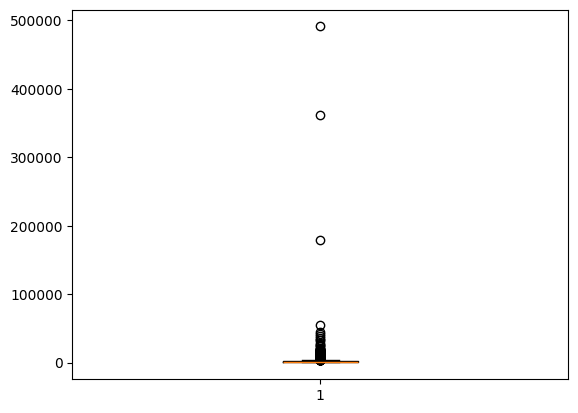

In [14]:
plt.boxplot(df[df['is_launched']]['percent_funded'])

In [15]:
df['state'].value_counts()

state
successful    2239
Name: count, dtype: int64

In [16]:
df.columns

Index(['backers_count', 'blurb', 'categoryId', 'categoryName', 'categorySlug',
       'converted_pledged_amount', 'country', 'country_displayable_name',
       'created_at', 'created_at_formatted', 'creatorAvatar', 'creatorId',
       'creatorName', 'creatorUrl', 'currency', 'currency_symbol',
       'currency_trailing_code', 'current_currency', 'deadline', 'description',
       'disable_communication', 'fx_rate', 'goal', 'id', 'image',
       'is_disliked', 'is_in_post_campaign_pledging_phase', 'is_launched',
       'is_liked', 'is_starrable', 'launched_at', 'launched_at_formatted',
       'link', 'locationId', 'locationName', 'name', 'percent_funded',
       'pledged', 'prelaunch_activated', 'pubDate', 'slug', 'spotlight',
       'staff_pick', 'state', 'state_changed_at', 'static_usd_rate', 'title',
       'url', 'usd_exchange_rate', 'usd_pledged', 'usd_type'],
      dtype='object')

In [17]:
df_selected=df[['id','name','backers_count','converted_pledged_amount','country','deadline','link','percent_funded']]

In [18]:
len(df.columns)

51

In [19]:

df[['goal','pledged','currency','usd_pledged','current_currency']]

,goal,pledged,currency,usd_pledged,current_currency
0,180,3550,MXN,169.899841,USD
1,220,4640,MXN,222.066270,USD
2,10,15,GBP,19.167222,USD
3,240,10370,MXN,507.403063,USD
4,100,5280,MXN,261.306778,USD
...,...,...,...,...,...
2393,1000000,13368738,JPY,89637.655665,USD
2394,100,15322,EUR,16647.489825,USD
2395,7777,93000,JPY,623.566860,USD
2396,4380,5749,EUR,6246.339839,USD


In [20]:
df['current_currency'].unique()

array(['USD'], dtype=object)

In [21]:
df['country'].unique()

array(['MX', 'GB', 'US', 'DE', 'CA', 'PL', 'BE', 'ES', 'FR', 'AU', 'SE',
       'IT', 'GR', 'NL', 'NZ', 'IE', 'JP', 'HK', 'DK', 'SG', 'NO', 'AT',
       'CH', 'SI'], dtype=object)

In [22]:
df['is_liked']

0       False
1       False
2       False
3       False
4       False
        ...  
2393    False
2394    False
2395    False
2396    False
2397    False
Name: is_liked, Length: 2239, dtype: bool

In [25]:
df['percent_funded'].min()

100.0

In [26]:
df_selected.to_csv('kickstarter_succesful.csv')

In [1]:
import pandas as pd
df_selected=pd.read_csv('kickstarter_succesful.csv')

In [3]:
df_selected['name'].str.len().max()

60